In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Comparison ##

In [2]:
3 > 1

True

In [3]:
type(3 > 1)

bool

In [4]:
True

True

In [5]:
true

NameError: name 'true' is not defined

In [6]:
3 = 3

SyntaxError: cannot assign to literal (3802935557.py, line 1)

In [7]:
3 == 3.0

True

In [8]:
10 != 2

True

In [9]:
x = 14
y = 3

In [10]:
x > 15

False

In [11]:
12 < x

True

In [12]:
x < 20

True

In [13]:
12 < x < 20

True

In [14]:
10 < x-y < 13

True

In [15]:
x > 13 and y < 3.14159

True

## Comparisons with arrays

In [16]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [17]:
pets == 'cat'

array([ True,  True, False,  True, False, False], dtype=bool)

In [18]:
1 + 1 + 0 + 1 + 0 + 0

3

In [19]:
sum(make_array(True, True, False, True, False, False))

3

In [20]:
sum(pets == 'dog')

2

In [21]:
np.count_nonzero(pets == 'dog')

2

In [22]:
x = np.arange(20, 31)

In [23]:
x > 28

array([False, False, False, False, False, False, False, False, False,
        True,  True], dtype=bool)

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [24]:
# Work in progress
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [25]:
one_round(4, 3)

1

In [26]:
one_round(2, 6)

In [27]:
# Final correct version
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [28]:
one_round(1, 1)

0

In [29]:
one_round(6, 5)

1

In [30]:
one_round(7, -1)

1

### Random Selection

In [31]:
guess = make_array('right', 'wrong')

In [32]:
np.random.choice(guess)

'right'

In [33]:
np.random.choice(guess)

'wrong'

In [34]:
np.random.choice(guess)

'wrong'

In [35]:
np.random.choice(guess, 8)

array(['wrong', 'right', 'wrong', 'wrong', 'right', 'wrong', 'right',
       'right'],
      dtype='<U5')

In [36]:
sum(np.random.choice(guess, 8) == 'right')

7

In [37]:
sum(np.random.choice(guess, 8) == 'right')

5

In [38]:
guesses = np.random.choice(guess, 8)
guesses

array(['right', 'wrong', 'right', 'wrong', 'right', 'right', 'wrong',
       'right'],
      dtype='<U5')

In [39]:
sum(guesses == 'right')

5

In [40]:
sum(guesses == 'wrong')

3

In [41]:
die_faces = np.arange(1, 7)

In [42]:
np.random.choice(die_faces)

4

In [43]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [44]:
simulate_one_round()

-1

### Appending Arrays

In [45]:
first = np.arange(4)
second = np.arange(10, 17)

In [46]:
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [47]:
first

array([0, 1, 2, 3])

In [48]:
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [49]:
first

array([0, 1, 2, 3])

In [50]:
second

array([10, 11, 12, 13, 14, 15, 16])

### Repeated Betting ###

In [51]:
results = make_array()

In [52]:
results = np.append(results, simulate_one_round())
results

array([-1.])

## `For` Statements

In [53]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [54]:
for x in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + x)

I love my cat
I love my dog
I love my rabbit


In [55]:
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [56]:
game_outcomes = make_array()

for i in np.arange(5):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([-1.,  0.,  1., -1.,  1.])

In [57]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([ 0.,  1., -1., ...,  1.,  1., -1.])

In [58]:
len(game_outcomes)

10000

In [59]:
results = Table().with_column('My winnings', game_outcomes)

In [60]:
results

My winnings
0
1
-1
-1
1
1
1
0
1
1


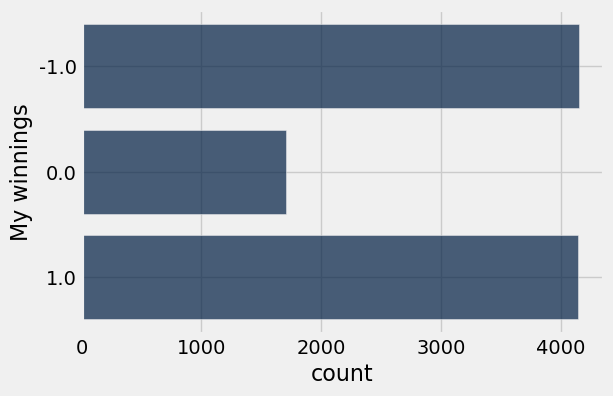

In [61]:
results.group('My winnings').barh('My winnings')